In [1]:
!pip install pandas scikit-learn seaborn matplotlib imbalanced-learn xgboost lightgbm catboost

# ==============================================================================
# MENTAL HEALTH RISK PREDICTION: A COMPREHENSIVE ANALYTICS PIPELINE
# ==============================================================================

In [1]:
# --- Import Initial Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

##### ==============================================================================
##### STEP 1: LOAD DATA AND HANDLE CLASS IMBALANCE
##### ==============================================================================

In [2]:
print(colored("--- Step 1: Loading Data & Handling Class Imbalance ---", "blue"))

try:
    df = pd.read_csv('mental_health_risk_dataset.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Error: 'mental_health_risk_dataset.csv' not found. Please check the file path.")
    exit()

--- Step 1: Loading Data & Handling Class Imbalance ---
✅ Dataset loaded successfully!



Distribution of Mental Health Risk (Before Oversampling):
mental_health_risk
High        20188
Moderate     5496
Low          3532
Name: count, dtype: int64


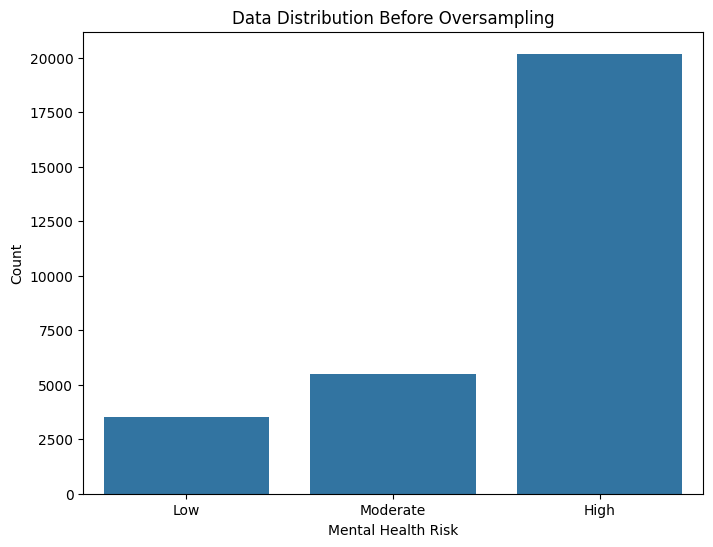

In [3]:
# --- View Data Distribution ---
print("\nDistribution of Mental Health Risk (Before Oversampling):")
print(df['mental_health_risk'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='mental_health_risk', data=df, order=['Low', 'Moderate', 'High'])
plt.title('Data Distribution Before Oversampling')
plt.xlabel('Mental Health Risk')
plt.ylabel('Count')
plt.show()

**NOTE: Oversampling (SMOTE) will be performed AFTER splitting the data to prevent data leakage.**

This is a crucial best practice.

##### ==============================================================================
##### STEP 2: DESCRIPTIVE AND STATISTICAL ANALYSIS
##### ==============================================================================

In [4]:
print(colored("\n--- Step 2: Descriptive and Statistical Analysis ---", "blue"))

print("\n--- First 5 Rows (head) ---")
df.head()


--- Step 2: Descriptive and Statistical Analysis ---

--- First 5 Rows (head) ---


,study_hours_per_week,sleep_hours_per_day,attendance_percentage,social_involvement_score,gpa,screen_time_hours,self_reported_stress_level,peer_relationship_score,parental_pressure_level,academic_deadlines_per_week,counselling_support_usage,break_frequency_per_day,procrastination_level,extracurricular_involvement,sleep_quality_score,relationship_status,substance_use,mental_health_risk
0,29.97,8.04,87.12,8,7.35,6.90,3,4,5,0,0,1,5,9,4,1,0,High
1,23.62,6.86,92.38,10,7.12,5.48,3,0,4,2,0,2,4,9,2,0,1,High
2,31.48,7.61,42.48,8,5.17,5.86,5,0,4,1,2,4,2,6,3,0,0,High
3,40.23,8.07,100.00,0,5.95,5.92,4,5,4,4,2,3,2,8,1,2,0,High
4,22.66,5.47,91.15,2,7.21,5.97,2,4,1,4,0,5,4,7,1,0,0,High


In [5]:
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29437 entries, 0 to 29436
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   study_hours_per_week         29437 non-null  float64
 1   sleep_hours_per_day          29437 non-null  float64
 2   attendance_percentage        29437 non-null  float64
 3   social_involvement_score     29437 non-null  int64  
 4   gpa                          29437 non-null  float64
 5   screen_time_hours            29437 non-null  float64
 6   self_reported_stress_level   29437 non-null  int64  
 7   peer_relationship_score      29437 non-null  int64  
 8   parental_pressure_level      29437 non-null  int64  
 9   academic_deadlines_per_week  29437 non-null  int64  
 10  counselling_support_usage    29437 non-null  int64  
 11  break_frequency_per_day      29437 non-null  int64  
 12  procrastination_level        29437 non-null  int64  

In [6]:
print("\n--- Descriptive Statistics (describe) ---")
df.describe()


--- Descriptive Statistics (describe) ---


,study_hours_per_week,sleep_hours_per_day,attendance_percentage,social_involvement_score,gpa,screen_time_hours,self_reported_stress_level,peer_relationship_score,parental_pressure_level,academic_deadlines_per_week,counselling_support_usage,break_frequency_per_day,procrastination_level,extracurricular_involvement,sleep_quality_score,relationship_status,substance_use
count,29437.000000,29437.000000,29437.000000,29437.000000,29437.000000,29437.00000,29437.000000,29437.000000,29437.000000,29437.000000,29437.000000,29437.000000,29437.000000,29437.000000,29437.000000,29437.000000,29437.000000
mean,25.017592,6.504132,79.442907,4.991745,6.993438,6.00926,2.993274,5.001970,3.004722,2.512213,0.395964,2.507796,2.983966,4.984985,5.502463,0.502837,0.247715
std,9.922772,1.491638,13.826742,3.166813,1.190852,2.00150,1.416262,3.160773,1.415802,1.702444,0.658204,1.704624,1.415731,3.165195,2.872152,0.669777,0.530419
min,0.000000,3.000000,13.060000,0.000000,2.420000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,18.210000,5.480000,70.010000,2.000000,6.180000,4.67000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,2.000000,3.000000,0.000000,0.000000
50%,25.020000,6.500000,80.130000,5.000000,7.000000,5.99000,3.000000,5.000000,3.000000,3.000000,0.000000,3.000000,3.000000,5.000000,5.000000,0.000000,0.000000
75%,31.750000,7.520000,90.160000,8.000000,7.810000,7.34000,4.000000,8.000000,4.000000,4.000000,1.000000,4.000000,4.000000,8.000000,8.000000,1.000000,0.000000
max,69.790000,12.000000,100.000000,10.000000,10.000000,14.16000,5.000000,10.000000,5.000000,5.000000,2.000000,5.000000,5.000000,10.000000,10.000000,2.000000,2.000000


In [7]:
# --- Data Cleaning and Initial Preprocessing ---
df.dropna(subset=['mental_health_risk'], inplace=True)
risk_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
df['mental_health_risk'] = df['mental_health_risk'].map(risk_mapping)
df_encoded = pd.get_dummies(df, columns=['relationship_status', 'substance_use'], drop_first=True)

##### ==============================================================================
##### STEP 3 & 4: EDA AND INITIAL CORRELATION HEATMAP
##### ==============================================================================

In [8]:
print("\n--- Check for Null Values ---")
df.isna().sum()


--- Check for Null Values ---


study_hours_per_week           0
sleep_hours_per_day            0
attendance_percentage          0
social_involvement_score       0
gpa                            0
screen_time_hours              0
self_reported_stress_level     0
peer_relationship_score        0
parental_pressure_level        0
academic_deadlines_per_week    0
counselling_support_usage      0
break_frequency_per_day        0
procrastination_level          0
extracurricular_involvement    0
sleep_quality_score            0
relationship_status            0
substance_use                  0
mental_health_risk             0
dtype: int64


--- Step 3 & 4: EDA and Initial Correlation Heatmap ---


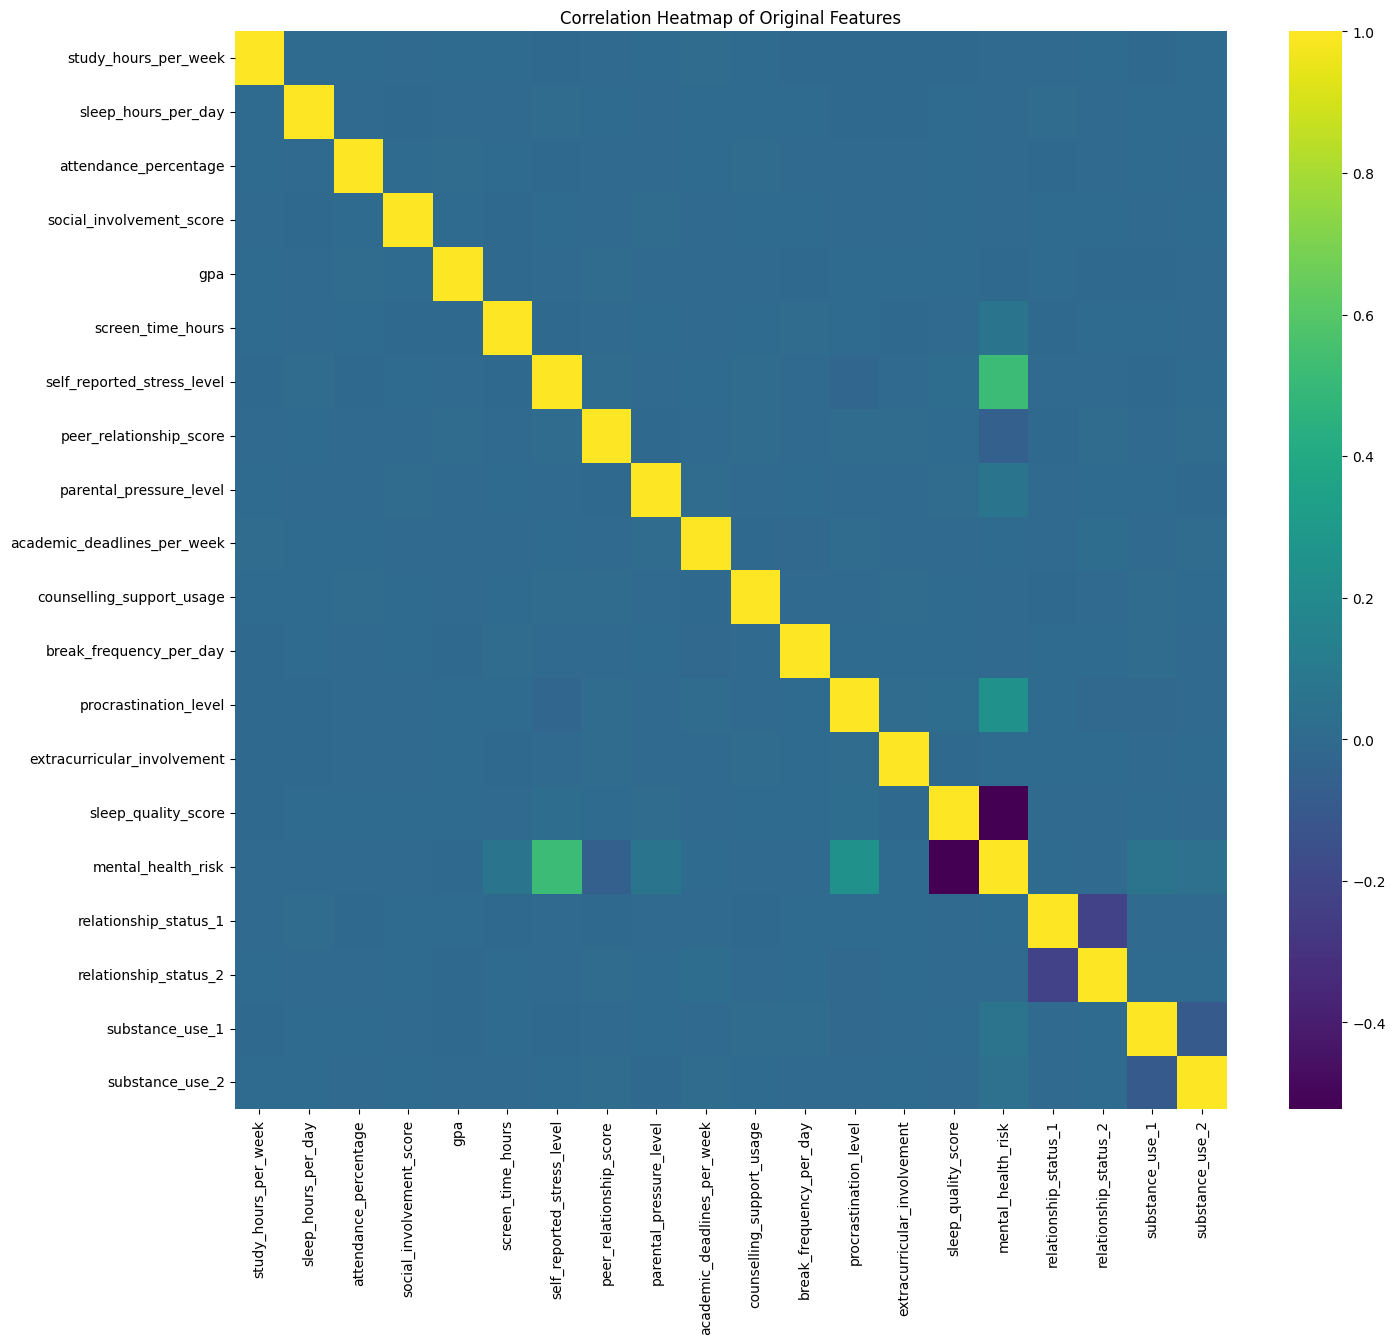

In [9]:
print(colored("\n--- Step 3 & 4: EDA and Initial Correlation Heatmap ---", "blue"))

# The distribution plot in Step 1 is part of EDA. Now we'll do the heatmap.
plt.figure(figsize=(16, 14))
sns.heatmap(df_encoded.corr(), annot=False, cmap='viridis') # annot=False for readability on many features
plt.title('Correlation Heatmap of Original Features')
plt.show()

##### ==============================================================================
##### STEP 5: GENERATE INTERACTION FEATURES AND PLOT NEW HEATMAP
##### ==============================================================================

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
print(colored("\n--- Step 5: Generating Interaction Features & New Heatmap ---", "blue"))

X_original = df_encoded.drop('mental_health_risk', axis=1)
y = df_encoded['mental_health_risk']

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X_original)
poly_feature_names = poly.get_feature_names_out(X_original.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names, index=X_original.index)
print(f"✅ Generated {X_poly_df.shape[1] - X_original.shape[1]} new interaction features.")

full_df_poly = pd.concat([X_poly_df, y], axis=1)
correlation_matrix_poly = full_df_poly.corr()


--- Step 5: Generating Interaction Features & New Heatmap ---
✅ Generated 171 new interaction features.


##### ==============================================================================
##### STEP 6 & 7: FEATURE IMPORTANCE, ENGINEERING, AND SELECTION
##### ==============================================================================

In [12]:
print(colored("\n--- Step 6 & 7: Feature Importance and Selection ---", "blue"))

# --- 6. Find Feature Importance (based on correlation) ---
target_correlations = correlation_matrix_poly['mental_health_risk'].abs().sort_values(ascending=False)
print("\nTop 30 Most Correlated Features (Original & Interactions):")
print(target_correlations.head(30))


--- Step 6 & 7: Feature Importance and Selection ---

Top 30 Most Correlated Features (Original & Interactions):
mental_health_risk                                        1.000000
sleep_quality_score                                       0.523135
self_reported_stress_level                                0.513744
gpa sleep_quality_score                                   0.495076
attendance_percentage sleep_quality_score                 0.489039
gpa self_reported_stress_level                            0.475786
attendance_percentage self_reported_stress_level          0.474475
self_reported_stress_level procrastination_level          0.468112
sleep_hours_per_day sleep_quality_score                   0.467361
sleep_hours_per_day self_reported_stress_level            0.450684
screen_time_hours self_reported_stress_level              0.433258
study_hours_per_week sleep_quality_score                  0.401777
screen_time_hours sleep_quality_score                     0.379825
self_reported_s

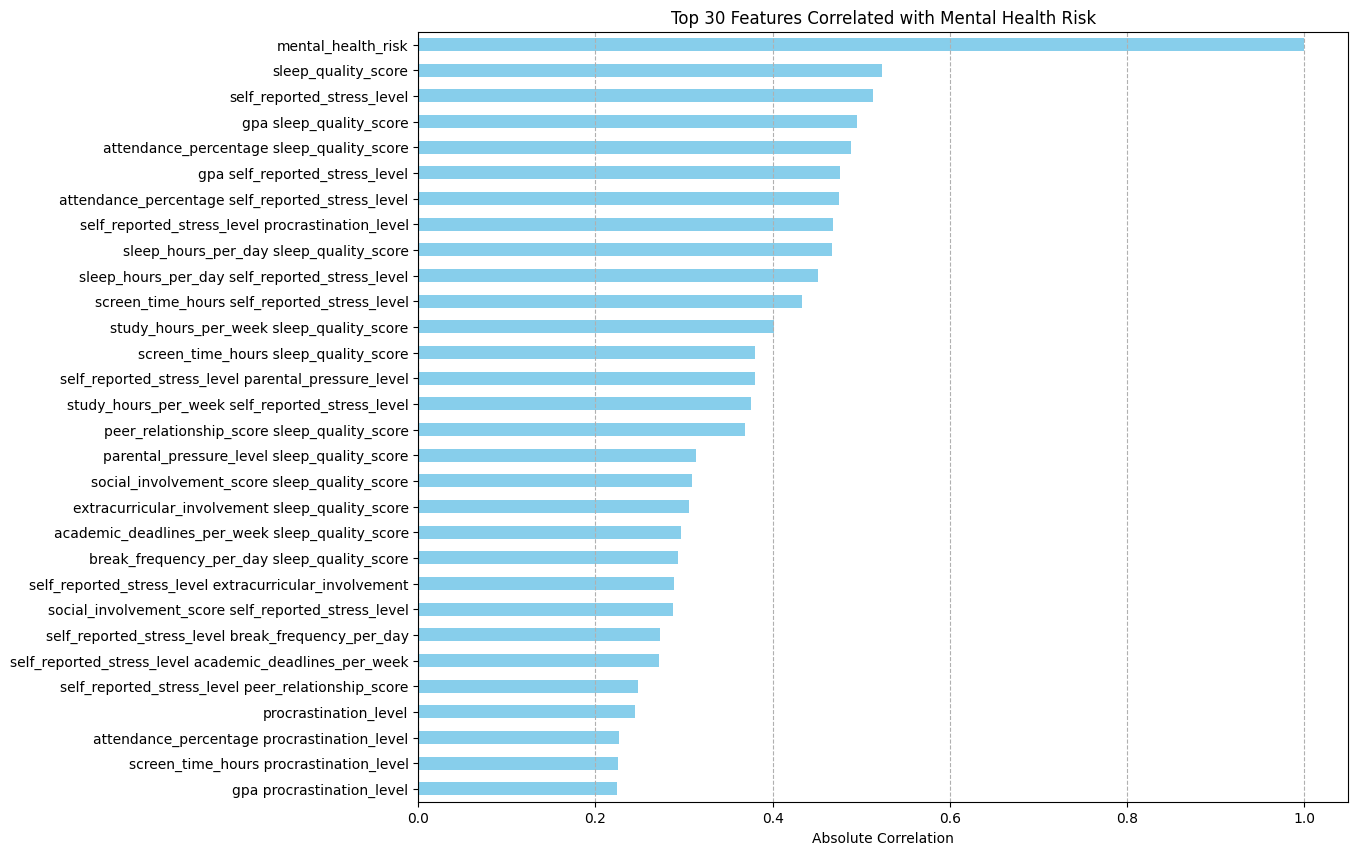

In [13]:
# Plot the feature importance graph
plt.figure(figsize=(12, 10))
target_correlations.head(30).sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 30 Features Correlated with Mental Health Risk')
plt.xlabel('Absolute Correlation')
plt.grid(axis='x', linestyle='--')
plt.show()

In [14]:
# --- 7. Perform Feature Selection ---
selected_feature_names = target_correlations[target_correlations >= 0.1].index.tolist()
selected_feature_names.remove('mental_health_risk')
X_selected = X_poly_df[selected_feature_names]
print(f"\n✅ Selected {len(selected_feature_names)} features for modeling with |correlation| >= 0.1.")


✅ Selected 42 features for modeling with |correlation| >= 0.1.


##### ==============================================================================
##### STEP 10 (Part A): DATA SPLITTING (60% Train, 20% Validation, 20% Test)
##### ==============================================================================

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [16]:
# First split: 80% for training+validation, 20% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Second split: 60% for training, 20% for validation
# (0.25 * 0.8 = 0.2, so test_size=0.25 of the 80% gives 20% of the total)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (17529, 42)
Validation set shape: (5843, 42)
Testing set shape: (5844, 42)


In [17]:
# --- Apply SMOTE only on the 60% training data ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nTraining set distribution after SMOTE:")
print(y_train_smote.value_counts())


Training set distribution after SMOTE:
mental_health_risk
0    12112
2    12112
1    12112
Name: count, dtype: int64


In [18]:
# --- Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

##### ==============================================================================
##### STEP 8 & 9: DEFINE ALL MODELS (CUSTOM ENSEMBLES & OTHERS)
##### ==============================================================================

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

In [20]:
print(colored("\n--- Step 8 & 9: Defining All Models ---", "blue"))


--- Step 8 & 9: Defining All Models ---


In [21]:
# --- 8a. Custom Bagging Ensemble ---
# We use VotingClassifier to combine bagged models
bag_dt = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
bag_nb = BaggingClassifier(GaussianNB(), n_estimators=10, random_state=42)
bag_knn = BaggingClassifier(KNeighborsClassifier(), n_estimators=10, random_state=42)
ensemble_bagging = VotingClassifier(estimators=[('dt', bag_dt), ('nb', bag_nb), ('knn', bag_knn)], voting='soft')

In [22]:
# --- 8b. Custom Boosting Ensemble ---
ensemble_boosting = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=50, random_state=42)

In [23]:
# --- 8c. Custom Stacking Ensemble ---
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]
meta_learner = LogisticRegression()
ensemble_stacking = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

In [24]:
# --- 8d. Hybrid Bagging & Boosting Ensemble ---
ensemble_hybrid = VotingClassifier(
    estimators=[('bagging', RandomForestClassifier(random_state=42)), ('boosting', LGBMClassifier(random_state=42))],
    voting='soft'
)

In [25]:
# --- 9. Define all models for training ---
models = {
    # Custom Ensembles
    "Custom Bagging": ensemble_bagging,
    "Custom Boosting": ensemble_boosting,
    "Custom Stacking": ensemble_stacking,
    "Hybrid Ensemble": ensemble_hybrid,
    # Standard Models
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    # Advanced Models
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "MLP Neural Network": MLPClassifier(max_iter=500, early_stopping=True, random_state=42)
}

##### ==============================================================================
##### STEP 10 (Part B): TRAIN ALL MODELS
##### ==============================================================================

In [27]:
print(colored("\n--- Step 10 (Part B): Training All Models ---", "blue"))
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train_smote)
print("\n✅ All models trained successfully!")


--- Step 10 (Part B): Training All Models ---
Training Custom Bagging...
Training Custom Boosting...
Training Custom Stacking...
Training Hybrid Ensemble...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10709
[LightGBM] [Info] Number of data points in the train set: 36336, number of used features: 42
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
Training SVM...
Training XGBoost...


c:\Users\anura\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:04:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10709
[LightGBM] [Info] Number of data points in the train set: 36336, number of used features: 42
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training CatBoost...
Training MLP Neural Network...

✅ All models trained successfully!


##### ==============================================================================
##### STEP 11 & 12: EVALUATE MODELS (METRICS, GAIN, LIFT, ROI)
##### ==============================================================================

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(colored("\n--- Step 11 & 12: Evaluating All Models ---", "blue"))
results = {}

# --- Helper Functions for Gain/Lift Plots ---
def plot_gain_lift(model_name, y_true, y_proba, class_index=2):
    y_class = (y_true == class_index)
    pos_prob = y_proba[:, class_index]
    indices = np.argsort(pos_prob)[::-1]
    y_sorted = y_class.iloc[indices] if isinstance(y_class, pd.Series) else y_class[indices]
    
    # Gain
    gain = np.cumsum(y_sorted) / np.sum(y_sorted)
    samples_pct = np.linspace(0, 1, len(gain))
    
    # Lift
    lift = gain / samples_pct
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.plot(samples_pct, gain, lw=2, label='Model Gain')
    ax1.plot([0, 1], [0, 1], 'k--', label='Baseline')
    ax1.set(xlabel='Percentage of samples', ylabel='Gain', title='Cumulative Gain Chart')
    ax1.legend(); ax1.grid(True)
    
    ax2.plot(samples_pct, lift, lw=2, label='Model Lift')
    ax2.plot([0, 1], [1, 1], 'k--', label='Baseline')
    ax2.set(xlabel='Percentage of samples', ylabel='Lift', title='Lift Chart')
    ax2.legend(); ax2.grid(True)
    
    fig.suptitle(f'Gain and Lift for {model_name} (Class: High Risk)', fontsize=16)
    plt.show()


--- Step 11 & 12: Evaluating All Models ---



--- Evaluating models on VALIDATION set ---

--- Custom Bagging ---
  Accuracy: 0.8989, F1 Score: 0.8634


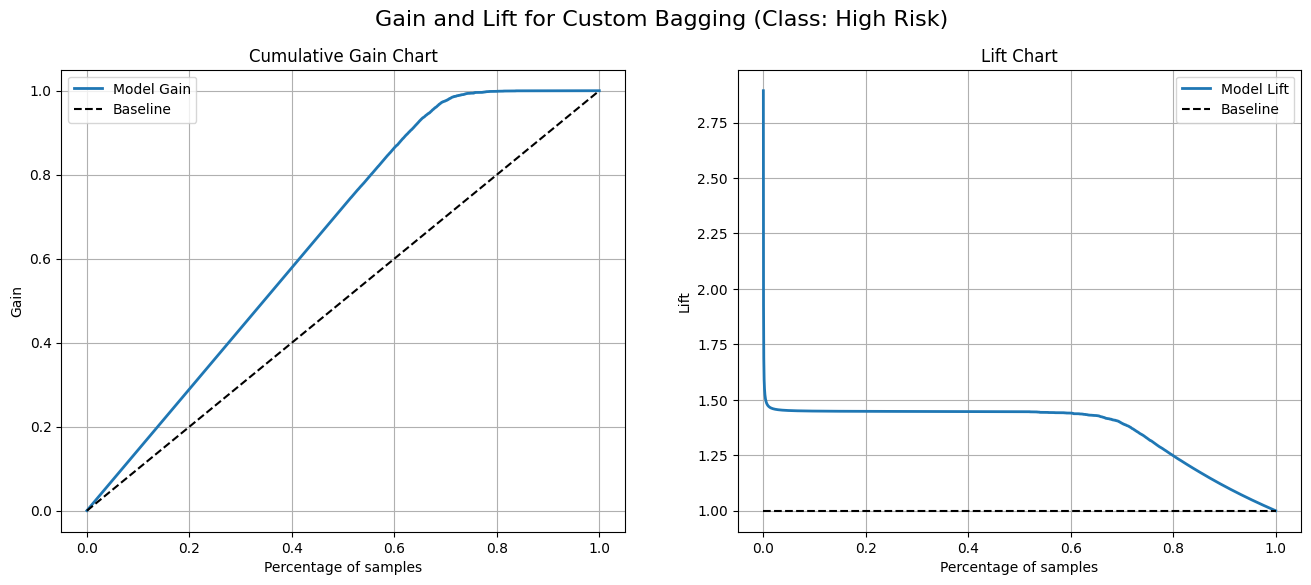


--- Custom Boosting ---
  Accuracy: 0.8975, F1 Score: 0.8603


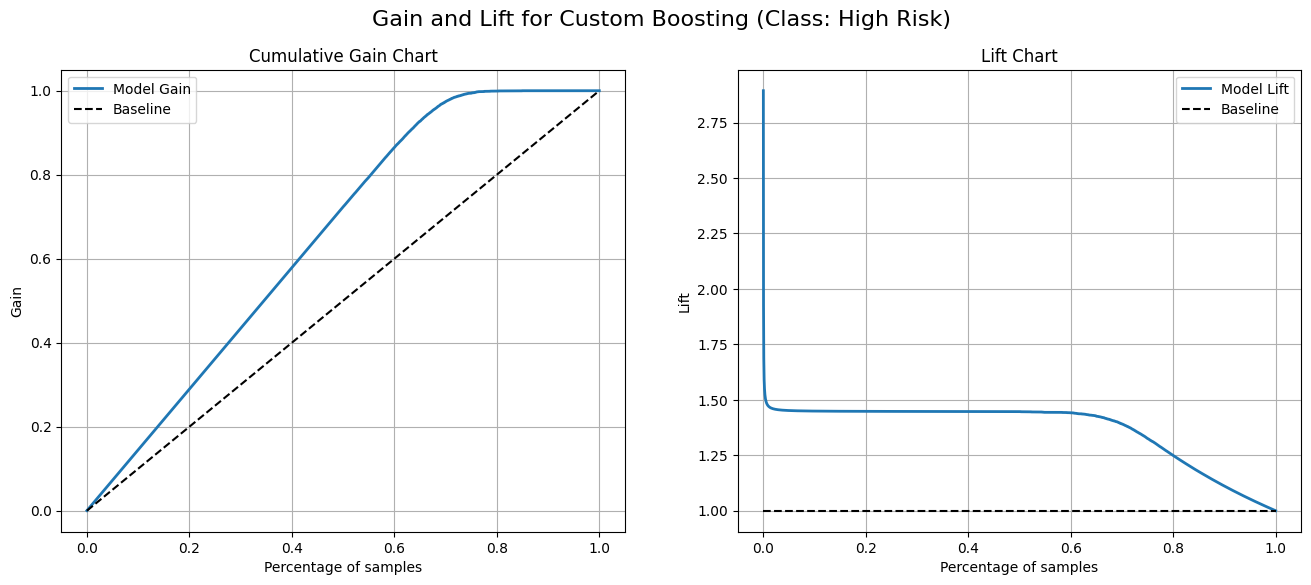


--- Custom Stacking ---
  Accuracy: 0.9235, F1 Score: 0.8761


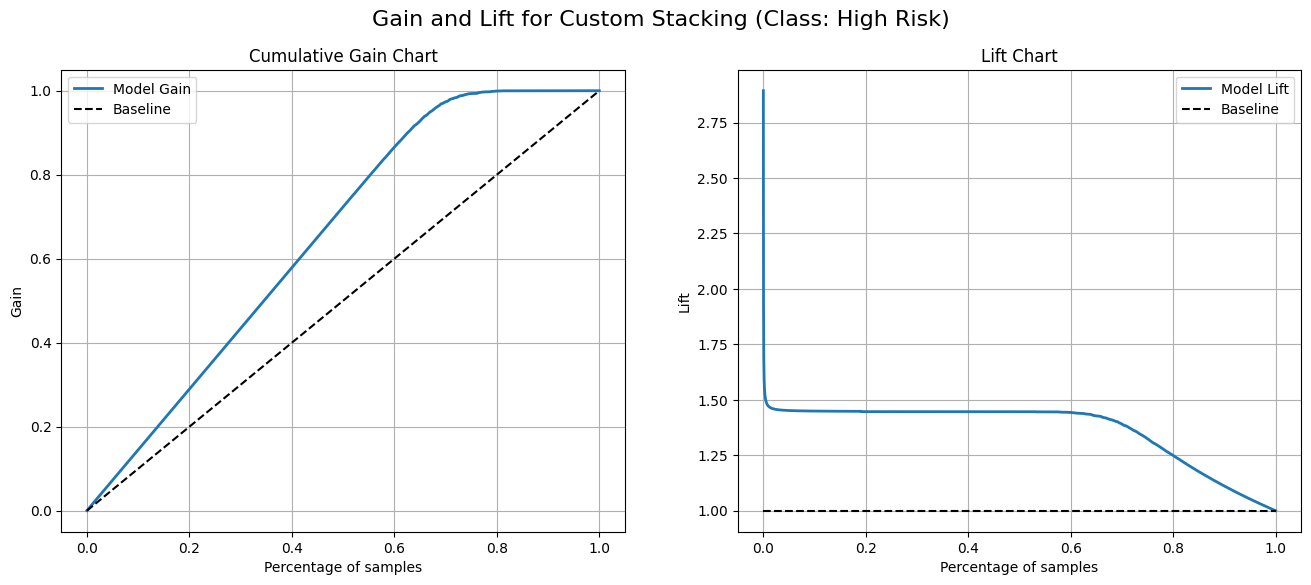


--- Hybrid Ensemble ---
  Accuracy: 0.9677, F1 Score: 0.9491


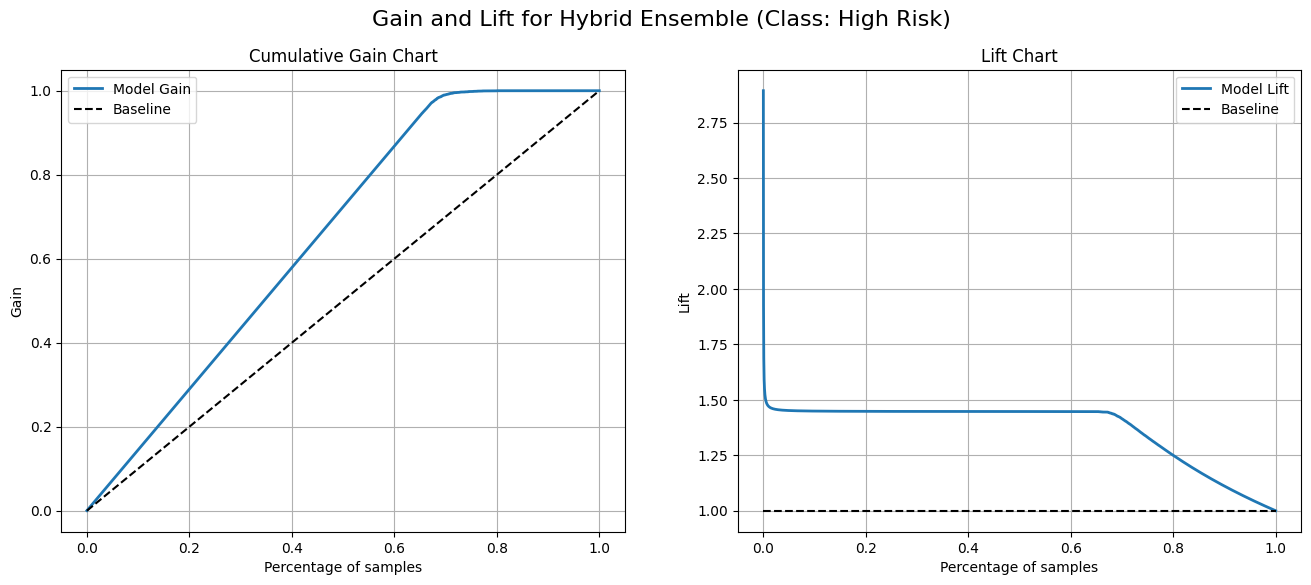


--- Logistic Regression ---
  Accuracy: 0.9497, F1 Score: 0.9265


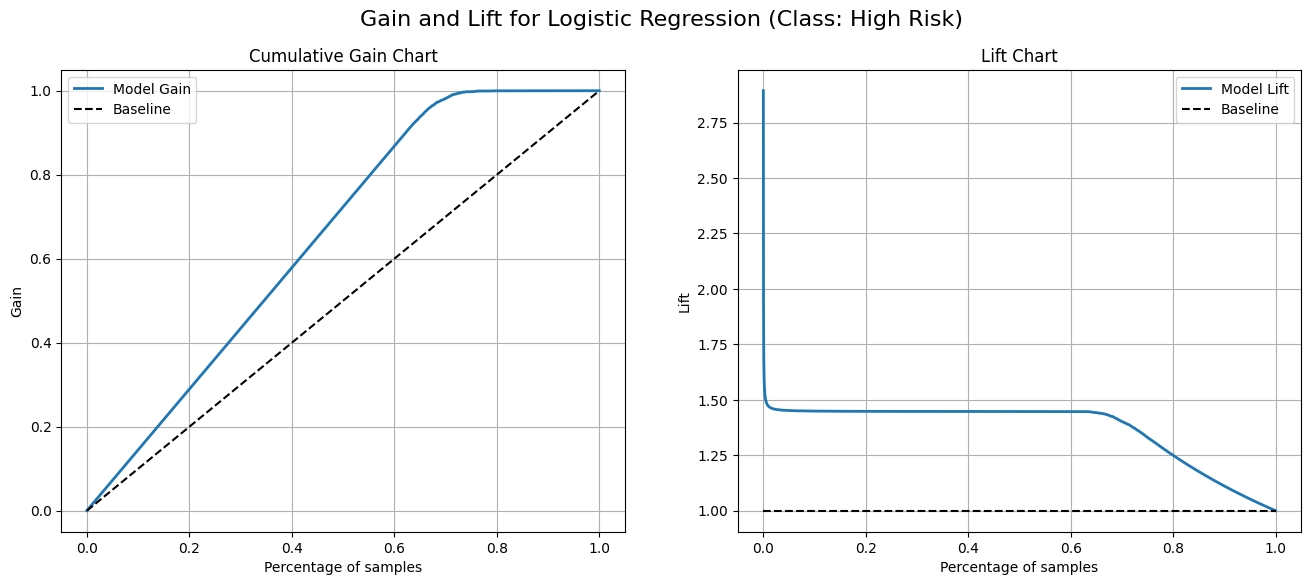


--- Random Forest ---
  Accuracy: 0.9392, F1 Score: 0.9088


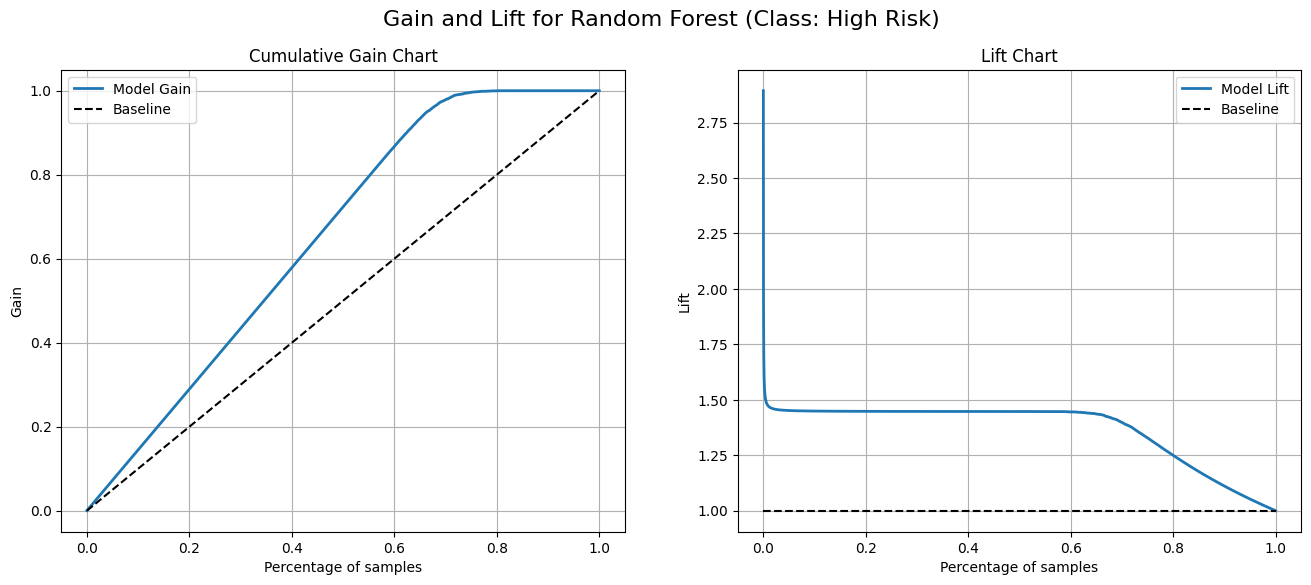


--- Gradient Boosting ---
  Accuracy: 0.9492, F1 Score: 0.9253


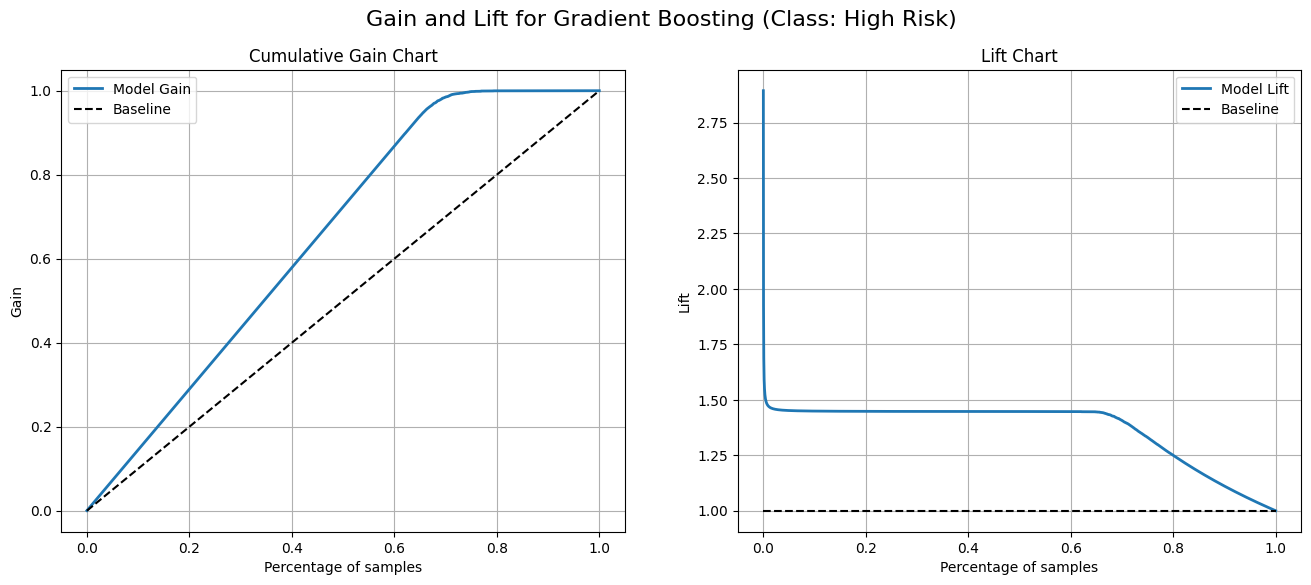


--- SVM ---
  Accuracy: 0.9533, F1 Score: 0.9291


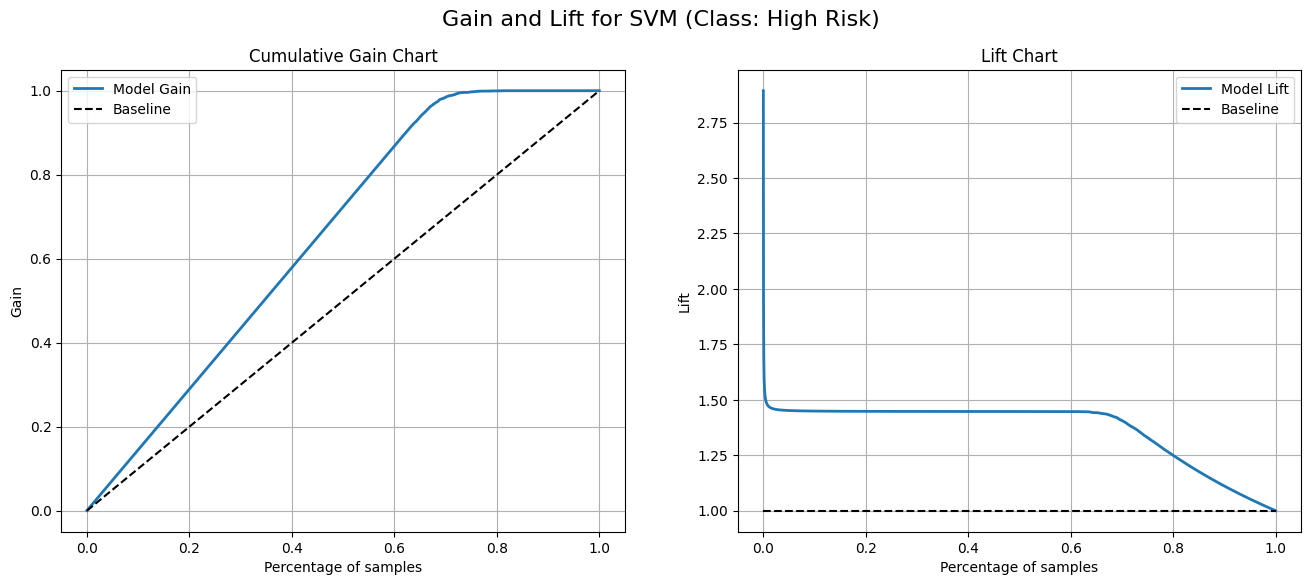


--- XGBoost ---
  Accuracy: 0.9736, F1 Score: 0.9581


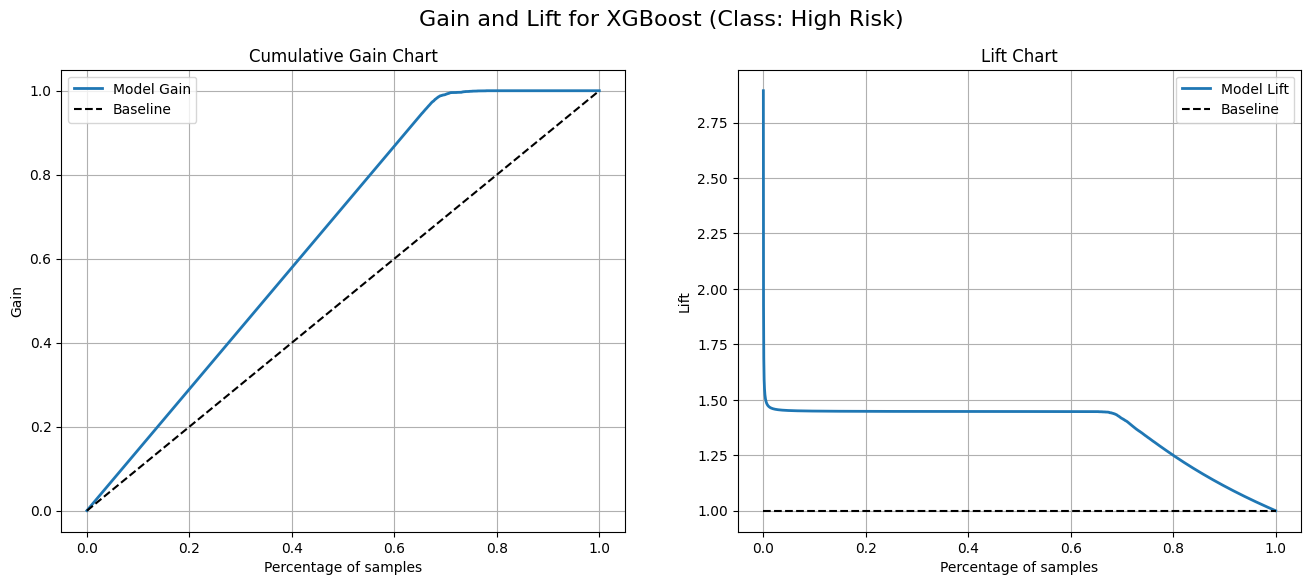


--- LightGBM ---
  Accuracy: 0.9745, F1 Score: 0.9586


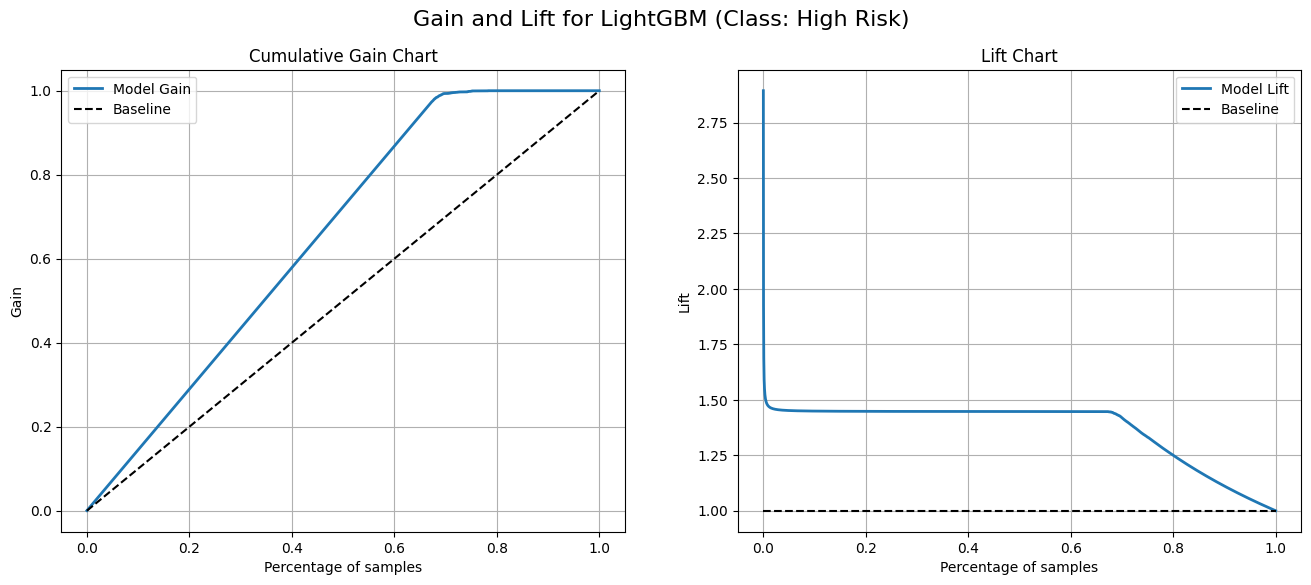


--- CatBoost ---
  Accuracy: 0.9774, F1 Score: 0.9644


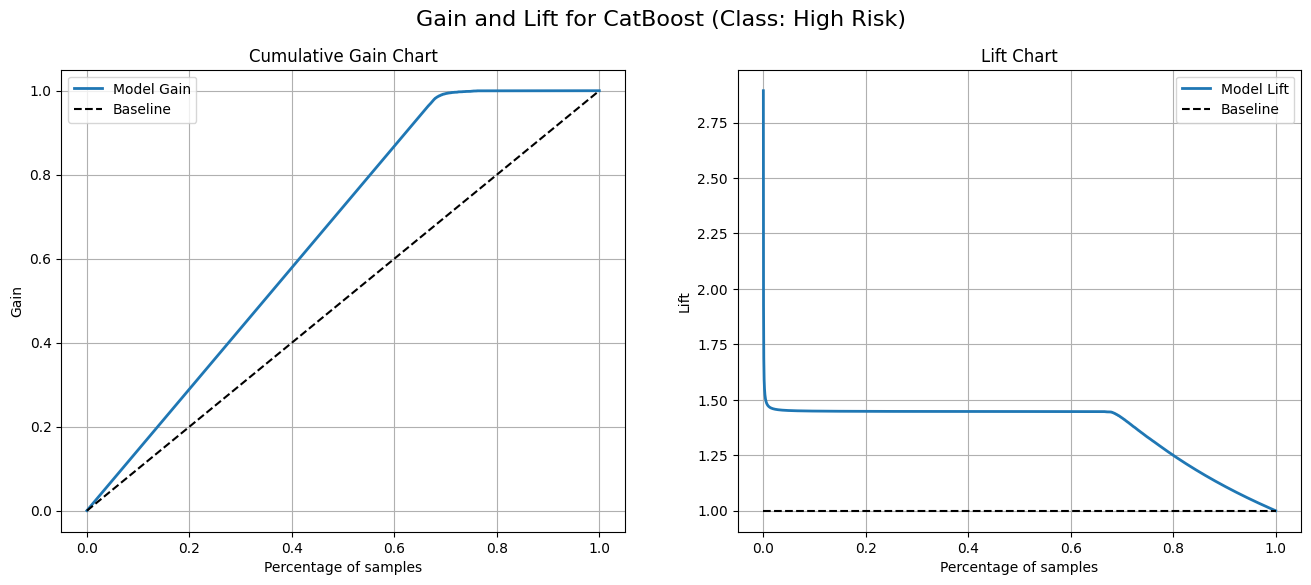


--- MLP Neural Network ---
  Accuracy: 0.9642, F1 Score: 0.9442


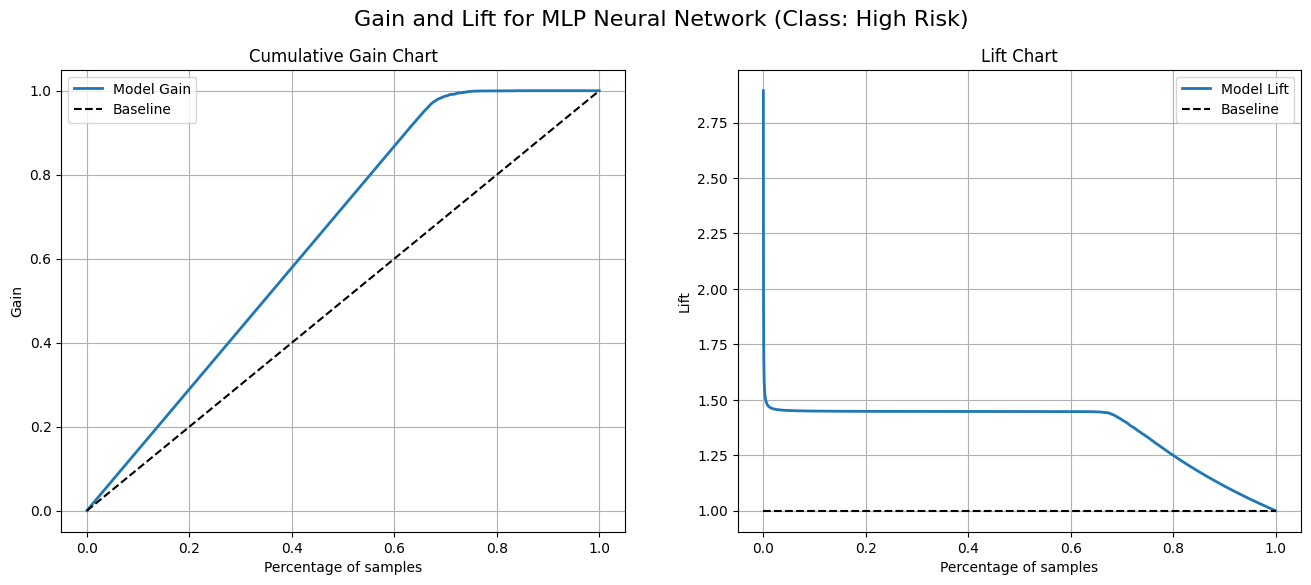

In [29]:
print("\n--- Evaluating models on VALIDATION set ---")
for name, model in models.items():
    y_pred = model.predict(X_val_scaled)
    y_proba = model.predict_proba(X_val_scaled)
    
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average='macro')
    rec = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    
    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
    print(f"\n--- {name} ---")
    print(f"  Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    
    plot_gain_lift(name, y_val, y_proba)


--- Comparative Analysis of Models ---
                     Accuracy  Precision    Recall  F1 Score
CatBoost             0.977409   0.959952  0.968936  0.964357
LightGBM             0.974499   0.952532  0.965026  0.958583
XGBoost              0.973644   0.953726  0.962653  0.958125
Hybrid Ensemble      0.967654   0.942818  0.955751  0.949086
MLP Neural Network   0.964231   0.941672  0.946841  0.944153
SVM                  0.953277   0.920981  0.937805  0.929061
Logistic Regression  0.949683   0.914767  0.939409  0.926454
Gradient Boosting    0.949170   0.911882  0.941122  0.925274
Random Forest        0.939244   0.902873  0.915413  0.908825
Custom Stacking      0.923498   0.878374  0.873951  0.876083
Custom Bagging       0.898853   0.845005  0.891854  0.863436
Custom Boosting      0.897484   0.874339  0.874894  0.860307


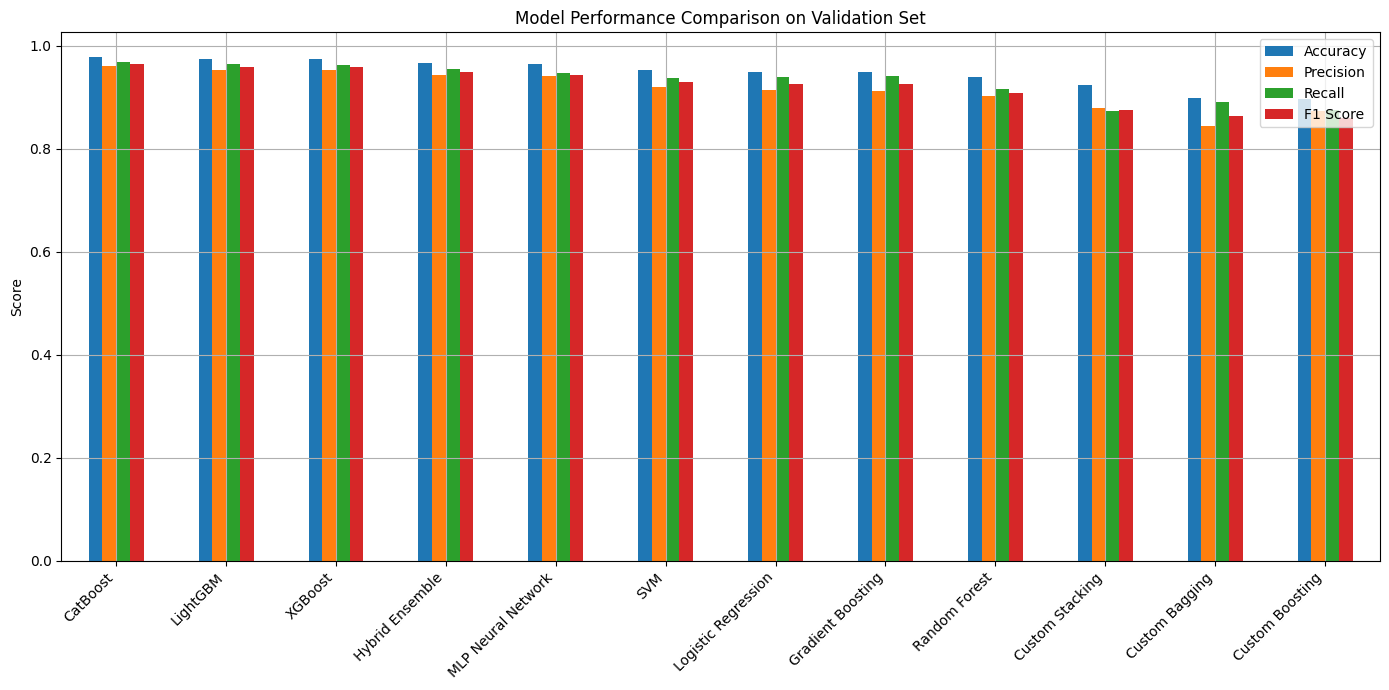

In [30]:
results_df = pd.DataFrame(results).T.sort_values(by='F1 Score', ascending=False)
print("\n--- Comparative Analysis of Models ---")
print(results_df)
results_df.plot(kind='bar', figsize=(14, 7), grid=True)
plt.title('Model Performance Comparison on Validation Set')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### ==============================================================================
##### STEP 13: AUTOMATICALLY SELECT THE BEST MODEL
##### ==============================================================================

In [31]:
print(colored("\n--- Step 13: Saving All Models & Selecting the Best ---", "blue"))
import os
import joblib

# --- Part A: Save All Trained Models ---
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True) # exist_ok=True prevents an error if the folder already exists
print(f"Directory '{MODEL_DIR}' created or already exists.")

for name, model in models.items():
    # Create a clean filename (e.g., "Custom_Bagging.pkl")
    filename = f"{MODEL_DIR}/{name.replace(' ', '_').replace('(', '').replace(')', '')}.pkl"
    joblib.dump(model, filename)
    print(f"  ✅ Saved model '{name}' to {filename}")


--- Step 13: Saving All Models & Selecting the Best ---
Directory 'models' created or already exists.
  ✅ Saved model 'Custom Bagging' to models/Custom_Bagging.pkl
  ✅ Saved model 'Custom Boosting' to models/Custom_Boosting.pkl
  ✅ Saved model 'Custom Stacking' to models/Custom_Stacking.pkl
  ✅ Saved model 'Hybrid Ensemble' to models/Hybrid_Ensemble.pkl
  ✅ Saved model 'Logistic Regression' to models/Logistic_Regression.pkl
  ✅ Saved model 'Random Forest' to models/Random_Forest.pkl
  ✅ Saved model 'Gradient Boosting' to models/Gradient_Boosting.pkl
  ✅ Saved model 'SVM' to models/SVM.pkl
  ✅ Saved model 'XGBoost' to models/XGBoost.pkl
  ✅ Saved model 'LightGBM' to models/LightGBM.pkl
  ✅ Saved model 'CatBoost' to models/CatBoost.pkl
  ✅ Saved model 'MLP Neural Network' to models/MLP_Neural_Network.pkl


In [32]:
# --- Part B: Automatically Select and Load the Best Model ---
# Find the name of the best model from the evaluation results
best_model_name = results_df.index[0]

# Construct the path to the saved model file
best_model_path = f"{MODEL_DIR}/{best_model_name.replace(' ', '_').replace('(', '').replace(')', '')}.pkl"

print(colored(f"\n🏆 Best performing model is: {best_model_name} (F1 Score: {results_df.iloc[0]['F1 Score']:.4f})", "green"))
print(f"   Loading this model from: {best_model_path}")

# Load the best model from the file for the prediction step
best_model = joblib.load(best_model_path)


🏆 Best performing model is: CatBoost (F1 Score: 0.9644)
   Loading this model from: models/CatBoost.pkl


##### ==============================================================================
##### STEP 14: INTERACTIVE PREDICTION SYSTEM
##### ==============================================================================

In [33]:
def predict_mental_health():
    """
    Takes user input with clear range guidance, processes it to match the
    training data structure, and makes a prediction using the best model.
    """
    print("\n--- 🧠 Student Mental Health Risk Prediction Form ---")
    print("Please provide the following details within the suggested ranges:")

    # --- Create a dictionary to hold user data ---
    user_data = {}

    # --- Define prompts with ranges for each feature ---
    # This dictionary now includes all original features for clarity
    prompts = {
        'study_hours_per_week': "Enter Study hours per week (e.g., 15.5): ",
        'sleep_hours_per_day': "Enter average sleep hours per day (e.g., 7): ",
        'attendance_percentage': "Enter class attendance percentage (0-100): ",
        'gpa': "Enter your current GPA (e.g., 3.4): ",
        'screen_time_hours': "Enter average screen time hours per day (e.g., 5.5): ",
        'social_involvement_score': "Enter social involvement score (1-10): ",
        'self_reported_stress_level': "Enter self-reported stress level (1-10): ",
        'peer_relationship_score': "Enter peer relationship score (1-10): ",
        'parental_pressure_level': "Enter parental pressure level (1-10): ",
        'academic_deadlines_per_week': "Enter number of academic deadlines per week (e.g., 3): ",
        'counselling_support_usage': "Enter counselling support usage score (1-10): ",
        'break_frequency_per_day': "Enter number of breaks you take per day (e.g., 4): ",
        'procrastination_level': "Enter procrastination level (1-10): ",
        'extracurricular_involvement': "Enter extracurricular involvement score (1-10): ",
        'sleep_quality_score': "Enter sleep quality score (1-10): ",
        # Updated prompts based on your clarification
        'relationship_status': "Enter Relationship Score (0=Single, 1-5=In a relationship): ",
        'substance_use': "Enter Substance Use (0=No, 1=Yes): "
    }

    # --- Collect user inputs for all original features ---
    for col in X_original.columns:
        # Check if the column is in our prompts dictionary
        if col in prompts:
            try:
                user_data[col] = float(input(f"  {prompts[col]}"))
            except ValueError:
                print("Invalid input. Please enter a valid number.")
                return
        else:
            # For any dummy columns that might not be in the prompts, default to 0
            user_data[col] = 0

    # --- The ROBUST FIX: Create and re-order the DataFrame ---
    # 1. Create a DataFrame from the user's input
    user_df = pd.DataFrame([user_data])

    # 2. Ensure it has the exact same columns in the exact same order as the training data
    #    This is the most reliable way to prevent feature name errors.
    input_data = user_df.reindex(columns=X_original.columns, fill_value=0)

    print("\nProcessing your inputs...")

    # --- Process input in the exact same way as training data ---
    user_poly = poly.transform(input_data)
    user_poly_df = pd.DataFrame(user_poly, columns=poly_feature_names)
    user_selected_df = user_poly_df[selected_feature_names]
    user_scaled = scaler.transform(user_selected_df)

    # --- Make Prediction ---
    prediction_array = best_model.predict(user_scaled)
    prediction_proba = best_model.predict_proba(user_scaled)[0]

    # --- Extract the integer from the 1D numpy array ---
    prediction_encoded = prediction_array[0,0]

    risk_levels = {0: "Low", 1: "Moderate", 2: "High"}
    predicted_risk = risk_levels[prediction_encoded]
    confidence = prediction_proba[prediction_encoded]

    print("\n--- 📈 Prediction Result ---")
    print(colored(f"  Predicted Mental Health Risk Level: {predicted_risk}", "cyan", attrs=['bold']))
    print(f"  Confidence: {confidence*100:.2f}%")
    print("\nDisclaimer: This is a predictive model and not a substitute for professional medical advice.")

In [34]:
# --- Run the prediction system ---
predict_mental_health()


--- 🧠 Student Mental Health Risk Prediction Form ---
Please provide the following details within the suggested ranges:

Processing your inputs...

--- 📈 Prediction Result ---
  Predicted Mental Health Risk Level: High
  Confidence: 100.00%

Disclaimer: This is a predictive model and not a substitute for professional medical advice.
